In [130]:
import pandas as pd
import seaborn as sns

In [131]:
df = pd.read_csv('../data/titanic/train.csv')

In [132]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EASY 

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


-----------------------------------------------------------------------------------------------------------------------
Проведя небольшой анализ данных, мы имеем информацию что из 891 пассажира, есть данные о возрасте только у 714, поэтому посчитать корректно процент детей из данной выборки мы можем только на основании 714 пассажиров.

In [222]:
children_percent = df['Age'][df['Age'] < 18].count()/df['Age'].count()
print(f'На борту татаника {round(children_percent*100, 3)}% детей от общегго кол-ва людей.')

На борту татаника 15.826% детей от общегго кол-ва людей.


In [223]:
male_ratio = df['Sex'][df['Sex'] == 'male' ].count()/df['Sex'].count()
famale_ratio= df['Sex'][df['Sex'] == 'female' ].count()/df['Sex'].count()
print(f'На борту татаника {round(male_ratio*100, 3)}% мужчин и {round(famale_ratio*100, 3)}% женщин')

На борту татаника 64.759% мужчин и 35.241% женщин


# NORMAL

In [136]:
null_age = df['Age'].isnull().sum()
print(f' По {null_age} людям нет инфо о возрасте')

 По 177 людям нет инфо о возрасте


<AxesSubplot:xlabel='Age', ylabel='Count'>

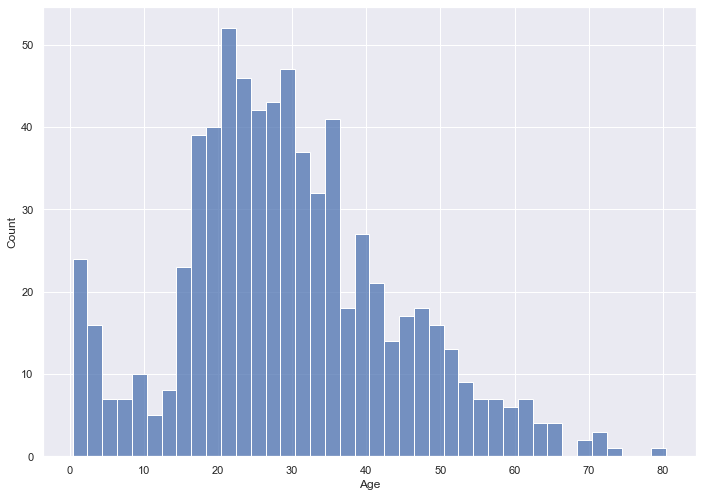

In [143]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data = df, x = 'Age',  binwidth=2) 

In [221]:
female_surv_percent = df[['Survived', 'Sex']].groupby(['Sex']).sum().loc['female'] / df['Sex'][df['Sex'] == 'female' ].count()
male_surv_percent = df[['Survived', 'Sex']].groupby(['Sex']).sum().loc['male'] / df['Sex'][df['Sex'] == 'male' ].count()
children_surv_percent = df[['Survived', 'Age']].groupby(df['Age'][df['Age'] < 18]).sum()['Survived'].sum()/df['Age'][df['Age'] < 18].count()
print(f'На борту татаника выжило {round(male_surv_percent.sum()*100, 3)}% мужчин и {round(female_surv_percent.sum()*100, 3)}% женщин, а так же {round(children_surv_percent*100, 3)}% детей')

На борту татаника выжило 18.891% мужчин и 74.204% женщин, а так же 53.982% детей
